In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 2D Data Gradient Descent

In [20]:
df = pd.read_csv("Data/multiple_linear_regression_dataset.csv")
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [21]:
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x.shape, y.shape

((20, 1), (20,))

[]

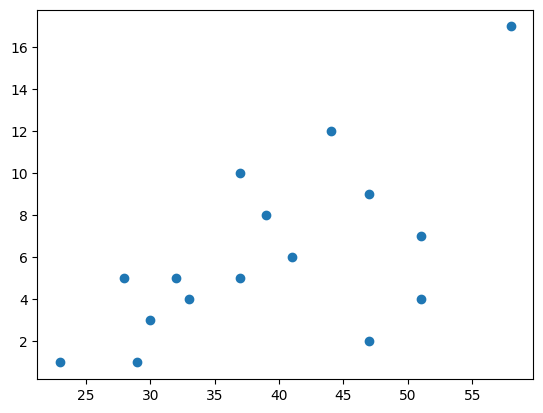

In [22]:
plt.scatter(x_train, y_train)
plt.plot()

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.22903881309954854

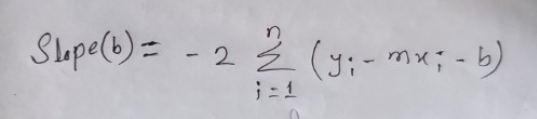

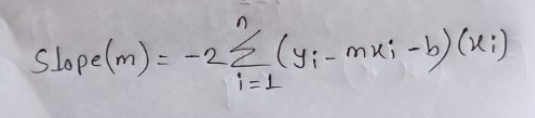

In [24]:
class GDRegressor:
    def __init__(self, lr, epochs) -> None:
        self.m = np.random.rand()
        self.b = np.random.rand()
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, x_train, y_train):
        for _ in range(self.epochs):
            slope_b = -2 * sum(y_train-self.m*x_train.flatten() - self.b)
            slope_m = -2 * sum((y_train-self.m*x_train.flatten()-self.b) * x_train.flatten())
            self.b = self.b - (slope_b * self.lr)
            self.m = self.m - (slope_m * self.lr)

    def predict(self, x_test):
        return self.m * x_test.flatten() + self.b

gd = GDRegressor(lr=0.0001, epochs=100)

In [25]:
gd.fit(x_train, y_train)
y_pred = gd.predict(x_test)
r2_score(y_test, y_pred)

-3.047238912980465e+126

### ND Data Gradient Descent

In [26]:
from sklearn.datasets import load_diabetes
x,y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.4399338661568968

In [28]:
x_train.shape[0], y_train.shape

(353, (353,))

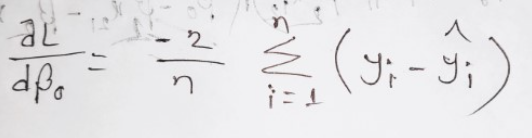

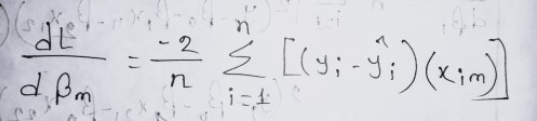

In [29]:
class MGDRegressor:
    def __init__(self, lr, epochs) -> None:
        self.coef = np.zeros(x_train.shape[1])
        self.intercept = np.random.rand()
        self.lr = lr
        self.epochs = epochs

    def fit(self, x_train, y_train):
        for _ in range(self.epochs):
            y_pred = np.dot(x_train, self.coef) + self.intercept
            
            intercept_derivative = -2 * np.sum(y_train - y_pred)/x_train.shape[0]
            self.intercept = self.intercept - (self.lr * intercept_derivative)

            coef_derivative = -2 * np.dot((y_train - y_pred), x_train)/x_train.shape[0]
            self.coef = self.coef - (self.lr * coef_derivative)

    def predict(self, x_test):
        return np.dot(x_test, self.coef) + self.intercept

In [30]:
mgdr = MGDRegressor(lr=0.7, epochs=100)
mgdr.fit(x_train, y_train)
y_pred = mgdr.predict(x_test)

In [31]:
r2_score(y_test, y_pred)

0.36264899954362784

### Stochastic Gradient Descent

In [32]:
class SGDRegressor:
    def __init__(self, lr, epochs) -> None:
        self.coef = np.zeros(x_train.shape[1])
        self.intercept = np.random.rand()
        self.lr = lr
        self.epochs = epochs

    def fit(self, x_train, y_train):
        for _ in range(self.epochs):
            for _ in range(x_train.shape[0]):
                idx = np.random.randint(0, x_train.shape[0])
                y_pred = np.dot(x_train[idx], self.coef) + self.intercept
                
                intercept_derivative = -2 * (y_train[idx] - y_pred)
                self.intercept = self.intercept - (self.lr * intercept_derivative)

                coef_derivative = -2 * np.dot((y_train[idx] - y_pred), x_train[idx])
                self.coef = self.coef - (self.lr * coef_derivative)

    def predict(self, x_test):
        return np.dot(x_test, self.coef) + self.intercept

In [33]:
sgd = SGDRegressor(lr=0.01, epochs=50)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
r2_score(y_test, y_pred)

0.4308169194826116

##### Sklearn Build-in SGD

In [34]:
from sklearn.linear_model import SGDRegressor

s = SGDRegressor(
    max_iter=50,
    learning_rate="constant",
    eta0=0.01
)

s.fit(x_train, y_train)
y_pred = s.predict(x_test)
r2_score(y_test, y_pred)

0.3788595137606364

### Mini Batch Gradient Descent

In [35]:
class MBGDRegressor:
    def __init__(self, lr, epochs, batch) -> None:
        self.coef = np.zeros(x_train.shape[1])
        self.intercept = np.random.rand()
        self.lr = lr
        self.epochs = epochs
        self.batch = batch

    def fit(self, x_train, y_train):
        num_batches = int(np.ceil(x_train.shape[0] / self.batch))

        for _ in range(self.epochs):
            for _ in range(num_batches):
                batch = np.random.choice(x_train.shape[0], size=10, replace=False)
                y_pred = np.dot(x_train[batch], self.coef) + self.intercept
                
                intercept_derivative = -2 * np.mean(y_train[batch] - y_pred)
                self.intercept = self.intercept - (self.lr * intercept_derivative)

                coef_derivative = -2 * np.dot((y_train[batch] - y_pred), x_train[batch])
                self.coef = self.coef - (self.lr * coef_derivative)

    def predict(self, x_test):
        return np.dot(x_test, self.coef) + self.intercept

In [36]:
mbgd = MBGDRegressor(lr=0.01, epochs=50, batch=10)
mbgd.fit(x_train, y_train)
y_pred = mbgd.predict(x_test)
r2_score(y_test, y_pred)

0.4342556211642594

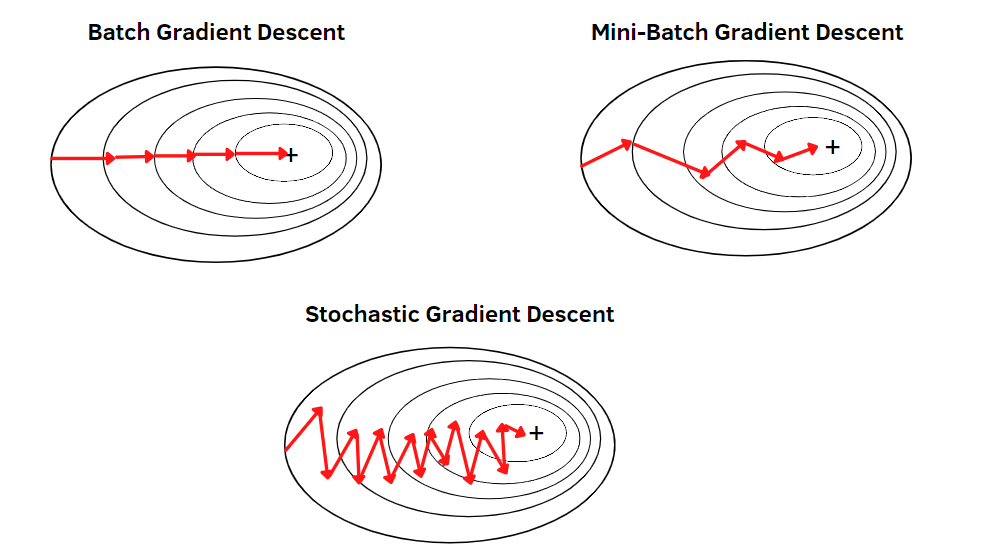